# COGS 108 - EEG Insights: Correlating Brain Activity with Confusion States in Educational Contexts

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Yuxiang Hong
- Claire Gao
- Milo Li
- Erin Li
- Xinyi Zhang

# Abstract

This study explores the relationship between EEG frequency band activity and student-reported confusion during educational videos of varying complexity. Delta (0.15) and Theta (0.15) are the strongest predictors of confusion, while Beta2 (0.02) and Gamma1 (0.01) are the weakest. Alpha2 shows the highest information gain, indicating a strong correlation with confusion states. The study applies preprocessing and ensemble methods to EEG data, aiming to identify the most effective technique for predicting confusion. Findings suggest EEG patterns can moderately predict confusion in real time, supporting adaptive educational systems, though further research is needed to address limitations like sample diversity and non-EEG factors.

# Research Question

How do variations in theta and beta EEG frequency band activity correlate with levels of student-reported confusion when viewing educational videos of differing complexity, and to what extent can these EEG patterns be used to predict confusion states in real time?



## Background and Prior Work

The rapid development of online education, particularly through Massive Open Online Courses (MOOCs), has opened up more opportunities for students worldwide to access a diverse range of study resources. However, unlike traditional classrooms that facilitate active interactions between instructors and students, online learning often lacks immediate feedback mechanisms. This limitation can make it difficult to identify and address moments of student confusion, which can hinder comprehension and motivation if left unresolved.

To tackle this issue, recent research has explored the use of electroencephalography (EEG) technology to detect cognitive states such as confusion in online learning environments. In the paper Using EEG to Improve Massive Open Online Courses Feedback Interaction, Wang et al. conducted a pilot study investigating the potential of EEG-based methods for identifying confusion among students while viewing MOOC videos. During the study, EEG data was collected from students as they watched video clips designed to evoke varying levels of comprehension—from basic topics assumed to be clear for college students (e.g., introductory algebra) to more complex subjects (e.g., quantum mechanics and stem cell research). Using a single-channel EEG device, the researchers captured data on brain activity from the frontal lobe, a region associated with cognitive processing and emotional response. Afterward, students self-reported their confusion levels on a scale from 1 (least confusing) to 7 (most confusing), generating both predefined and self-reported labels of confusion. By training machine learning classifiers on the EEG data, the researchers demonstrated a moderate ability to distinguish between confusing and non-confusing experiences, achieving accuracies that, while limited, were above random chance and comparable to human observers interpreting student body language.1 These findings suggest the feasibility of EEG technology as a tool for detecting confusion in educational settings, which could support more adaptive and responsive online learning environments.

Our project builds upon Wang et al.'s foundational work by applying EEG data analysis to further understand and classify confusion states in students. Similar to their study design, we utilize a dataset containing EEG data collected from 10 college students while they engage with educational video clips that range from basic to complex topics. We analyze the average EEG signals with higher frequency data over every 0.5 seconds as students watch these videos, alongside their self-reported confusion ratings.

Based on provious works, different brain wave frequencies are associated with different cognitive states (Kaushik et al).

Theta Waves (4–8 Hz): Theta waves are often associated with memory formation, learning, and attention. Alpha Waves (8–13 Hz): Alpha waves are most commonly linked to relaxation and reduced attentional demands. Beta Waves (13–28 Hz): Beta waves are generally associated with active cognitive processing and engagement in problem-solving tasks.2 Therefore, By monitoring shifts in these frequency bands, we could potentially predict instances of confusion in real time, enabling insights into how students process and react to different educational stimuli.

By analyzing this EEG recording data, our project aims to use students’ confusion score ratings to build machine learning models that accurately classify instances of student confusion. The insights gained could support the future development of applications in online education, such as real-time adaptive learning systems that adjust content based on student engagement and cognitive load. Ultimately, this project seeks to contribute to a more personalized and effective online learning experience, utilizing EEG data to bridge the feedback gap inherent in remote education.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Wang, H., Li, Y., Hu, X., Yang, Y., Meng, Z., & Chang, K. M. (2013, June). Using EEG to Improve Massive Open Online Courses Feedback Interaction. [Link to paper](https://www.cs.cmu.edu/~kkchang/paper/WangEtAl.2013.AIED.EEG-MOOC.pdf)
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Kaushik, P., Moye, A., Vugt, M.v. et al. Decoding the cognitive states of attention and distraction in a real-life setting using EEG. Sci Rep 12, 20649 (2022). [Link to paper](https://doi.org/10.1038/s41598-022-24417-w)

# Hypothesis


We hypothesize that by recording EEG data while students watch lecture videos, we can predict moments of confusion. Specifically, we predict that beta (12-29 Hz) and gamma (30-100 Hz) band activity will increase as confusion intensifies, with a 20% or greater rise in power from baseline levels during moments of high cognitive load. This increase will enable us to classify confusion instances accurately. We expect beta waves to correlate with heightened cognitive engagement, as students attempt to process complex information, while gamma activity may reflect the effort involved in integrating and making sense of new content. To quantify these changes, we will measure the percent change in power across these bands and establish a threshold (e.g., 0.5 correlation coefficient) for significant associations with confusion scores. We will use statistical tests (e.g., t-tests) to confirm that the observed increases differ significantly from baseline and conduct a classification analysis to determine the predictive accuracy of EEG patterns in identifying confusion states.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Confused student EEG brainwave data
  - Link to the dataset: https://www.kaggle.com/datasets/wanghaohan/confused-eeg/data
  - Number of observations: 100
  - Number of variables: 10
- Dataset #2 (if you have more than one!)
  - Dataset Name: Demographic data
  - Link to the dataset: https://www.kaggle.com/datasets/wanghaohan/confused-eeg/data
  - Number of observations: 10
  - Number of variables: 3

EEG Data (EEG_confused.csv): This dataset contains electroencephalography (EEG) readings for various subjects while they watched different educational videos, identified by the VideoID variable. Important variables include Attention, Meditation, Raw, Delta, Theta, Alpha1, Alpha2, Beta1, Beta2, Gamma1, and Gamma2, which represent metrics of brainwave activity in different frequency bands. These metrics are proxies for cognitive states, with frequencies like Theta and Beta potentially indicating levels of focus or confusion. The variable we try to predict is user-definedlabeln, which represents confusion level, 1 is confused and 0 is not confused. Data types include floats. Preprocessing steps might involve handling missing values, normalizing EEG signals, and converting categorical columns from float to integer data types for model input.

Demographic Data (demographic_info.csv): This dataset likely includes demographic information for each participant, which may include variables such as SubjectID, Age, Gender, Education Level, and potentially additional personal or socioeconomic characteristics. These variables provide context for individual differences in cognitive responses, with Age and Education Level possibly affecting EEG outcomes or interpretations. Data types are likely to be a mix of integers (for IDs and age), categorical (for gender and education level), and strings or floats for other characteristics. Preprocessing would involve cleaning categorical data, encoding categorical variables as needed, and ensuring IDs match those in the EEG dataset for accurate merging.

We plan to merge these two datasets into a single dataframe with inner merge on SubjectID.

## Dataset #1 Confused student EEG brainwave data

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline

In [175]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
data= pd.read_csv("project_data/EEG_data.csv") # Need to change the path to "COGS 108/project_data/EEG_data.csv" in github
file_names = {
    0: 'physics_0.m4v',
    1: 'calculus_1.m4v',
    2: 'calculus_2.m4v',
    3: 'alegbra_3.m4v',
    4: 'alegbra_4.m4v',
    5: 'physics_5.m4v',
    6: 'Stem_Cell_6.m4v',
    7: 'analog_signals.m4v',
    8: 'digital_signals.m4v',
    9: 'audio_signals.m4v'
}
data['VideoID'] = data['VideoID'].map(file_names)
data.to_csv("EEG_confused.csv",index=False)
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [176]:
eeg_df = pd.read_csv("EEG_confused.csv") # Need to change the path to "COGS 108/project_data/EEG_confused.csv" in github
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


We convert SubjectID, predefinedlabel, and user-definedlabeln to integer, since they are in fact integers but presented as floats.

In [177]:
eeg_df['SubjectID'] = eeg_df['SubjectID'].astype(int)
eeg_df['predefinedlabel'] = eeg_df['predefinedlabel'].astype(int)
eeg_df['user-definedlabeln'] = eeg_df['user-definedlabeln'].astype(int)
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0
1,0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0
2,0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0
3,0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0
4,0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0


We renamed user-definedlabeln to "confused" where 1 is confused, 0 is not confused

In [178]:
eeg_df = eeg_df.rename(columns = {'user-definedlabeln': 'confused'})

## Dataset #2 Demographic data

We renamed the column 'subject ID' to 'SubjectID' to match the EEG data

In [179]:
demo_df = pd.read_csv("project_data/demographic_info.csv") # Need to change the path to "COGS 108/project_data/demographic_info.csv" in github
demo_df = demo_df.rename(columns = {'subject ID': 'SubjectID'})
demo_df.head()

,SubjectID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


## Merge datasets

Merging the two dataset on SubjectId We merge the EEG data with demographic data based on the SubjectID column to enrich the dataset with additional features.

In [180]:
df = eeg_df.merge(demo_df,how = 'inner',on = 'SubjectID')
# Strip whitespace from column names
df.columns = df.columns.str.strip()
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,confused,age,ethnicity,gender
0,0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0,25,Han Chinese,M
1,0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0,25,Han Chinese,M
2,0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0,25,Han Chinese,M
3,0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0,25,Han Chinese,M
4,0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0,25,Han Chinese,M


In [181]:
df.describe()

,SubjectID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,confused,age
count,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000
mean,4.487394,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960
std,2.865373,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148
min,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000
25%,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000
50%,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000
75%,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000
max,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000


## Data Cleaning

Cheking and handling missing values

In [182]:
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0].index.tolist()
missing_values_count, columns_with_missing_values

(SubjectID          0
 VideoID            0
 Attention          0
 Mediation          0
 Raw                0
 Delta              0
 Theta              0
 Alpha1             0
 Alpha2             0
 Beta1              0
 Beta2              0
 Gamma1             0
 Gamma2             0
 predefinedlabel    0
 confused           0
 age                0
 ethnicity          0
 gender             0
 dtype: int64,
 [])

<span style="background-color: yellow">We explored the dataset and found no missing values, thus we don't need to handle missing values<span style="background-color: yellow">

Checking for Duplicates

In [183]:
print("Number of duplicate data: ", df.duplicated().sum())

Number of duplicate data:  0


So, we have checked that there are no duplicated data in our dataset.

Checking data types

In [184]:
print(df.dtypes)

SubjectID            int32
VideoID             object
Attention          float64
Mediation          float64
Raw                float64
Delta              float64
Theta              float64
Alpha1             float64
Alpha2             float64
Beta1              float64
Beta2              float64
Gamma1             float64
Gamma2             float64
predefinedlabel      int32
confused             int32
age                  int64
ethnicity           object
gender              object
dtype: object


From this step, we have checked that these data types are what we expected. So, no extra action needed to change our data types.

Checking For Outliers

We use visulization to check if there are any outliers in our dataset.

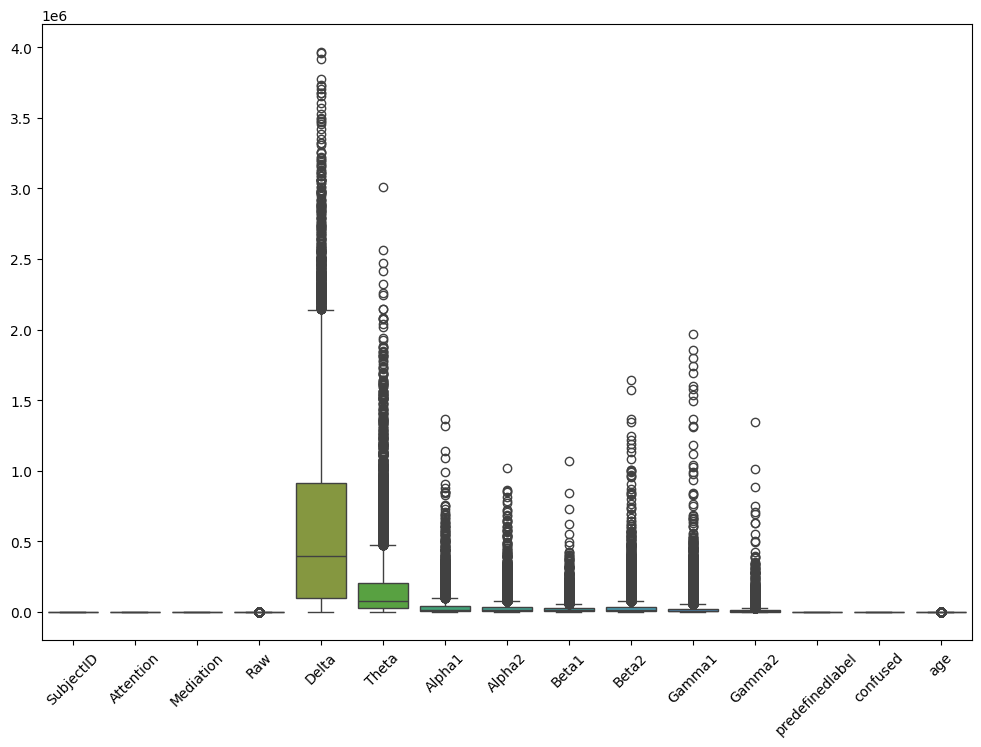

In [185]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
xticks = plt.xticks(rotation=45)
plt.show()

Through the generalized plot, we can see that outliers do exist. In order to avoid the affection on our data analysis and model performance, we handle these outliers in the below step.

Handle Outliers by removing outliers using IQR

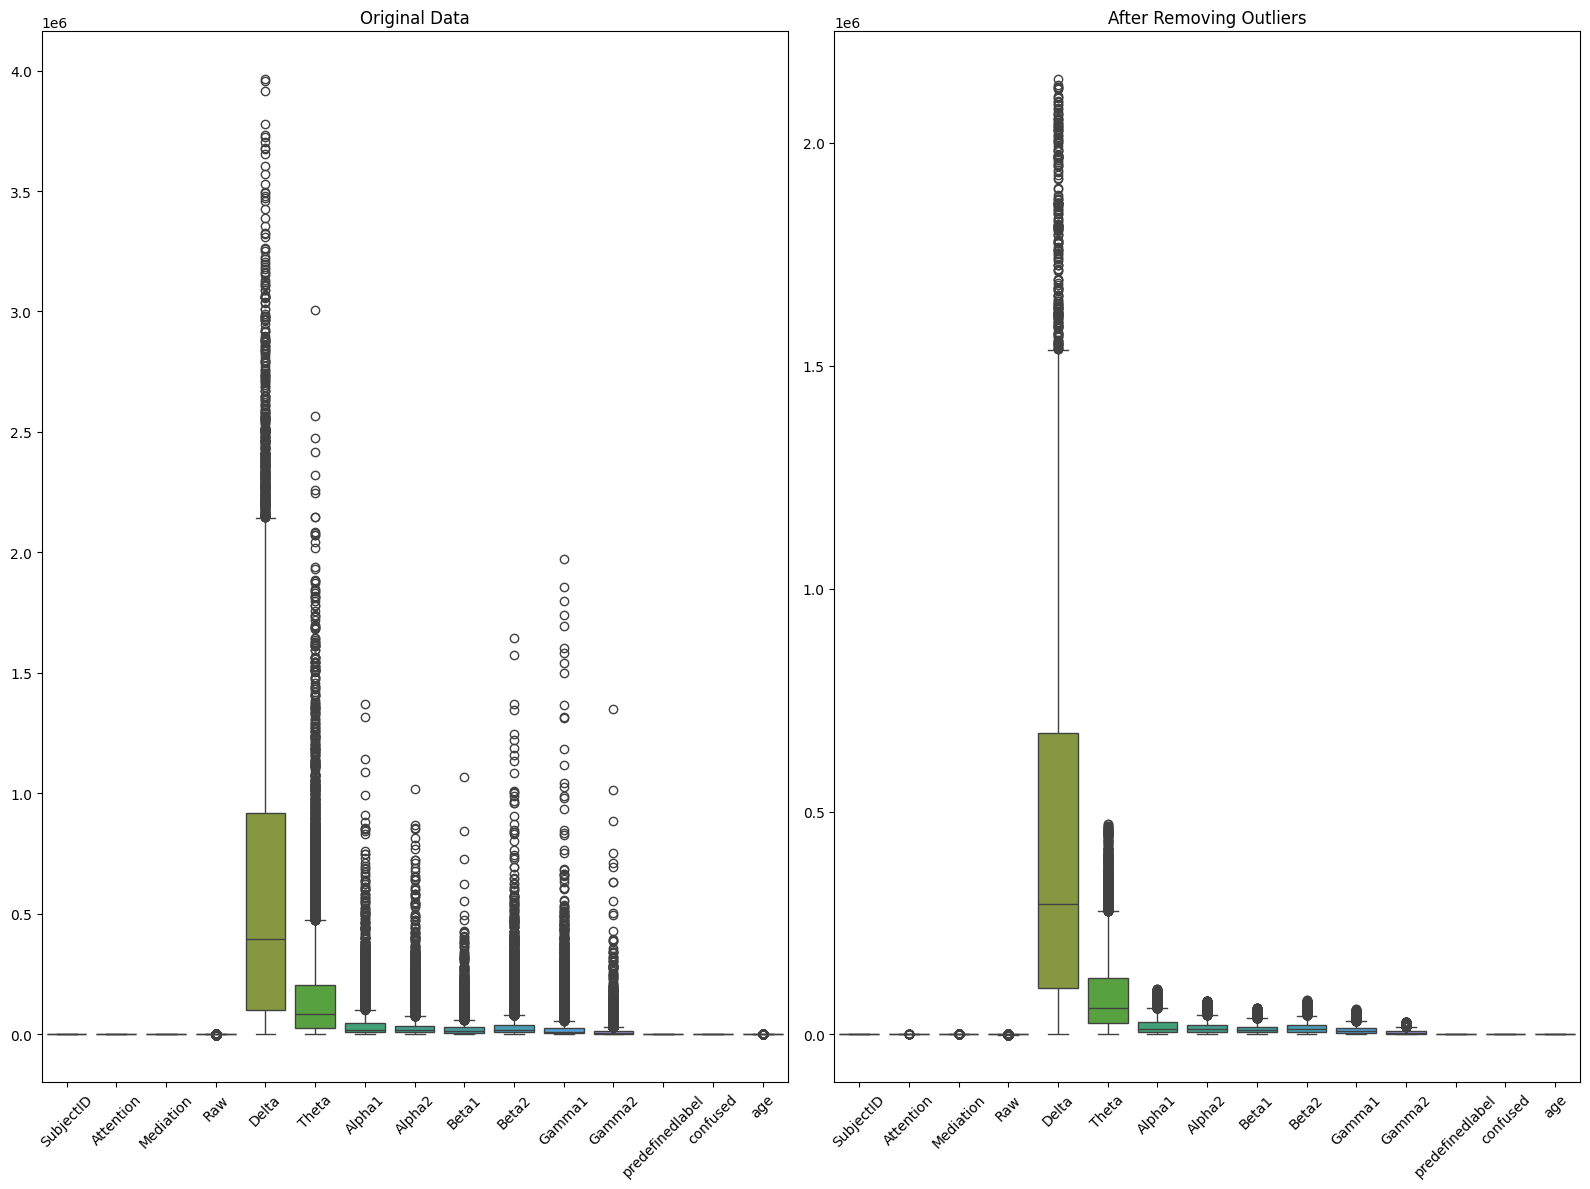

In [186]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# set the lower and upper bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = numeric_df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]

# Boxplot before and after removing outliers
plt.figure(figsize=(16, 12))

# Original data boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=numeric_df)
xticks = plt.xticks(rotation=45)
plt.title('Original Data')

# Cleaned data boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned)
xticks = plt.xticks(rotation=45)
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()

**Key Observations:**

After removing outliers using the IQR method, the cleaned data shows reduced variability and a more compact range in the boxplot compared to the original data. 

This improves the dataset's representativeness by excluding extreme values that could skew analysis or modeling results.

**Feture selection**

Since we want to predict confusion (the 'confused' column, where 1 is confused and 0 is not confused), based on different types of brain waves (Delta, Theta, Alpha, Beta, Gamma), we only preserves 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', and 'confused' columns.

In [187]:
df_cleaned = df[['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'confused']]
df_cleaned

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,confused
0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0
1,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0
2,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0
3,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0
4,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0
...,...,...,...,...,...,...,...,...,...
12806,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0
12807,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0
12808,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0
12809,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0


# Results

## Exploratory Data Analysis

## Discovering Relationship between variables

We first step is to understand the data we will use in the Exploratory Data Analysis, and through drawing the plots of correlations between each pair of variables to discover the relationships between these used variables

We create a histogram to show the frequency distribution of each feature. This helps identify how often values occur across different ranges in the data for each feature.

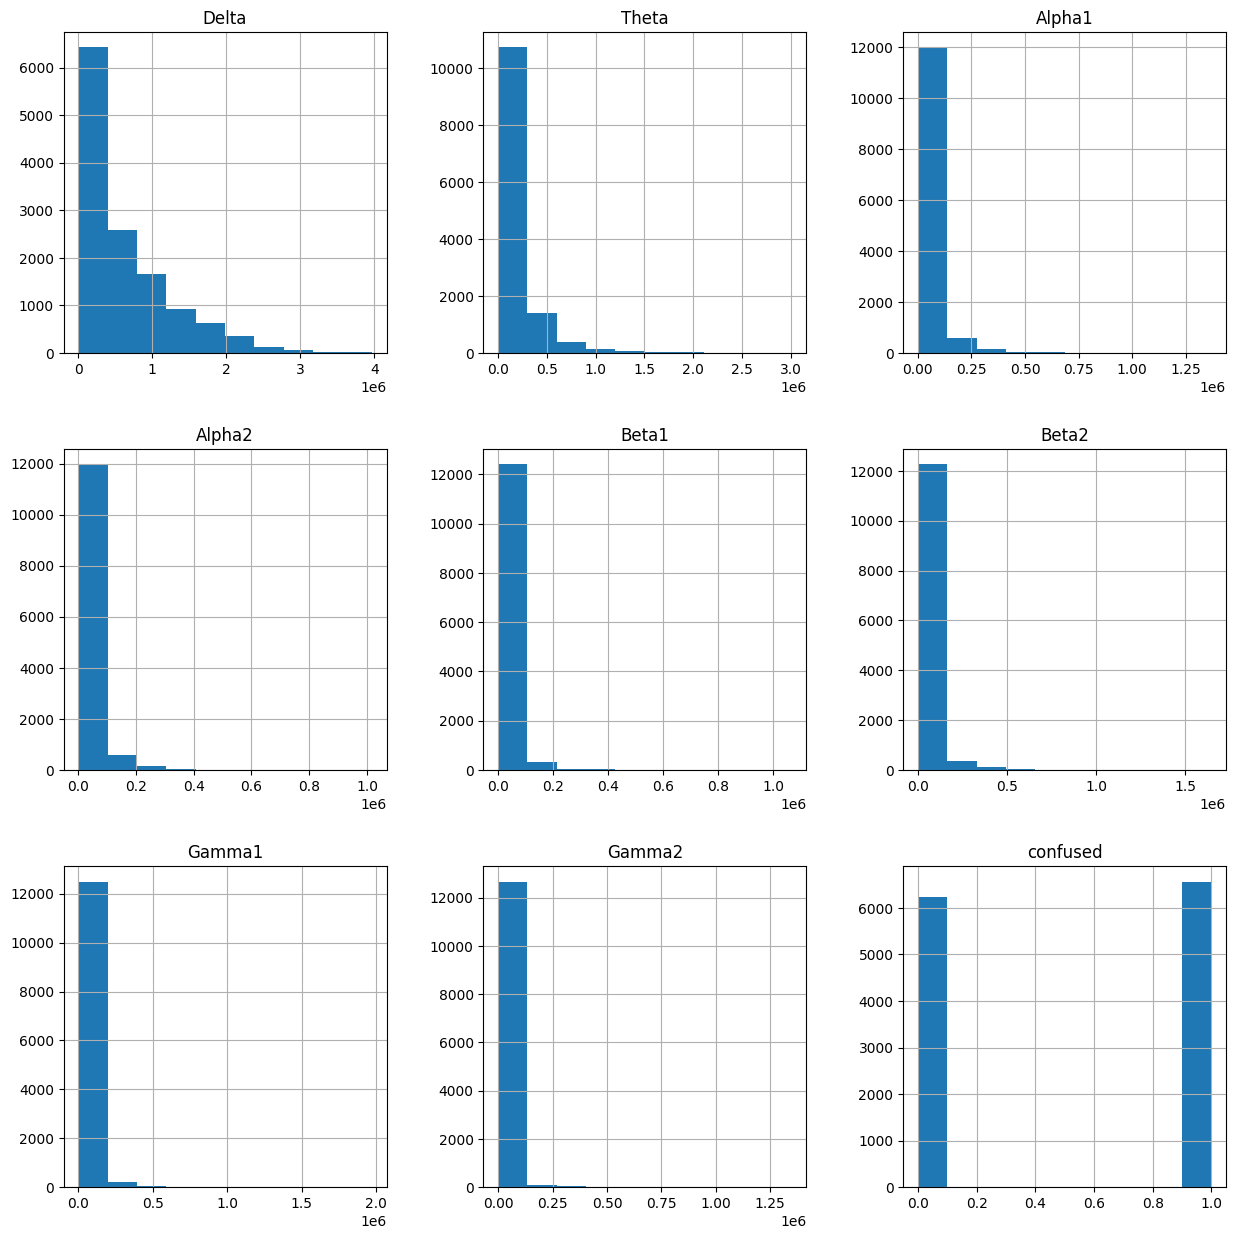

In [188]:
df_cleaned.hist(figsize = (15,15))
plt.show()

**Key Observations:**

The data is not uniformly distributed; most EEG features have a long tail, suggesting possible outliers or non-normality.

The binary nature of the confused variable confirms that it is categorical (1 for confused 0 for not confused) and there are roughly same amount of confused instances versed nonconfused instances, this confirms confused is suitable as a target for classification tasks.

We create a kde plot to understand the distribution of variables since KDE provides a smoothed estimate of the probability density function (PDF) of the data.

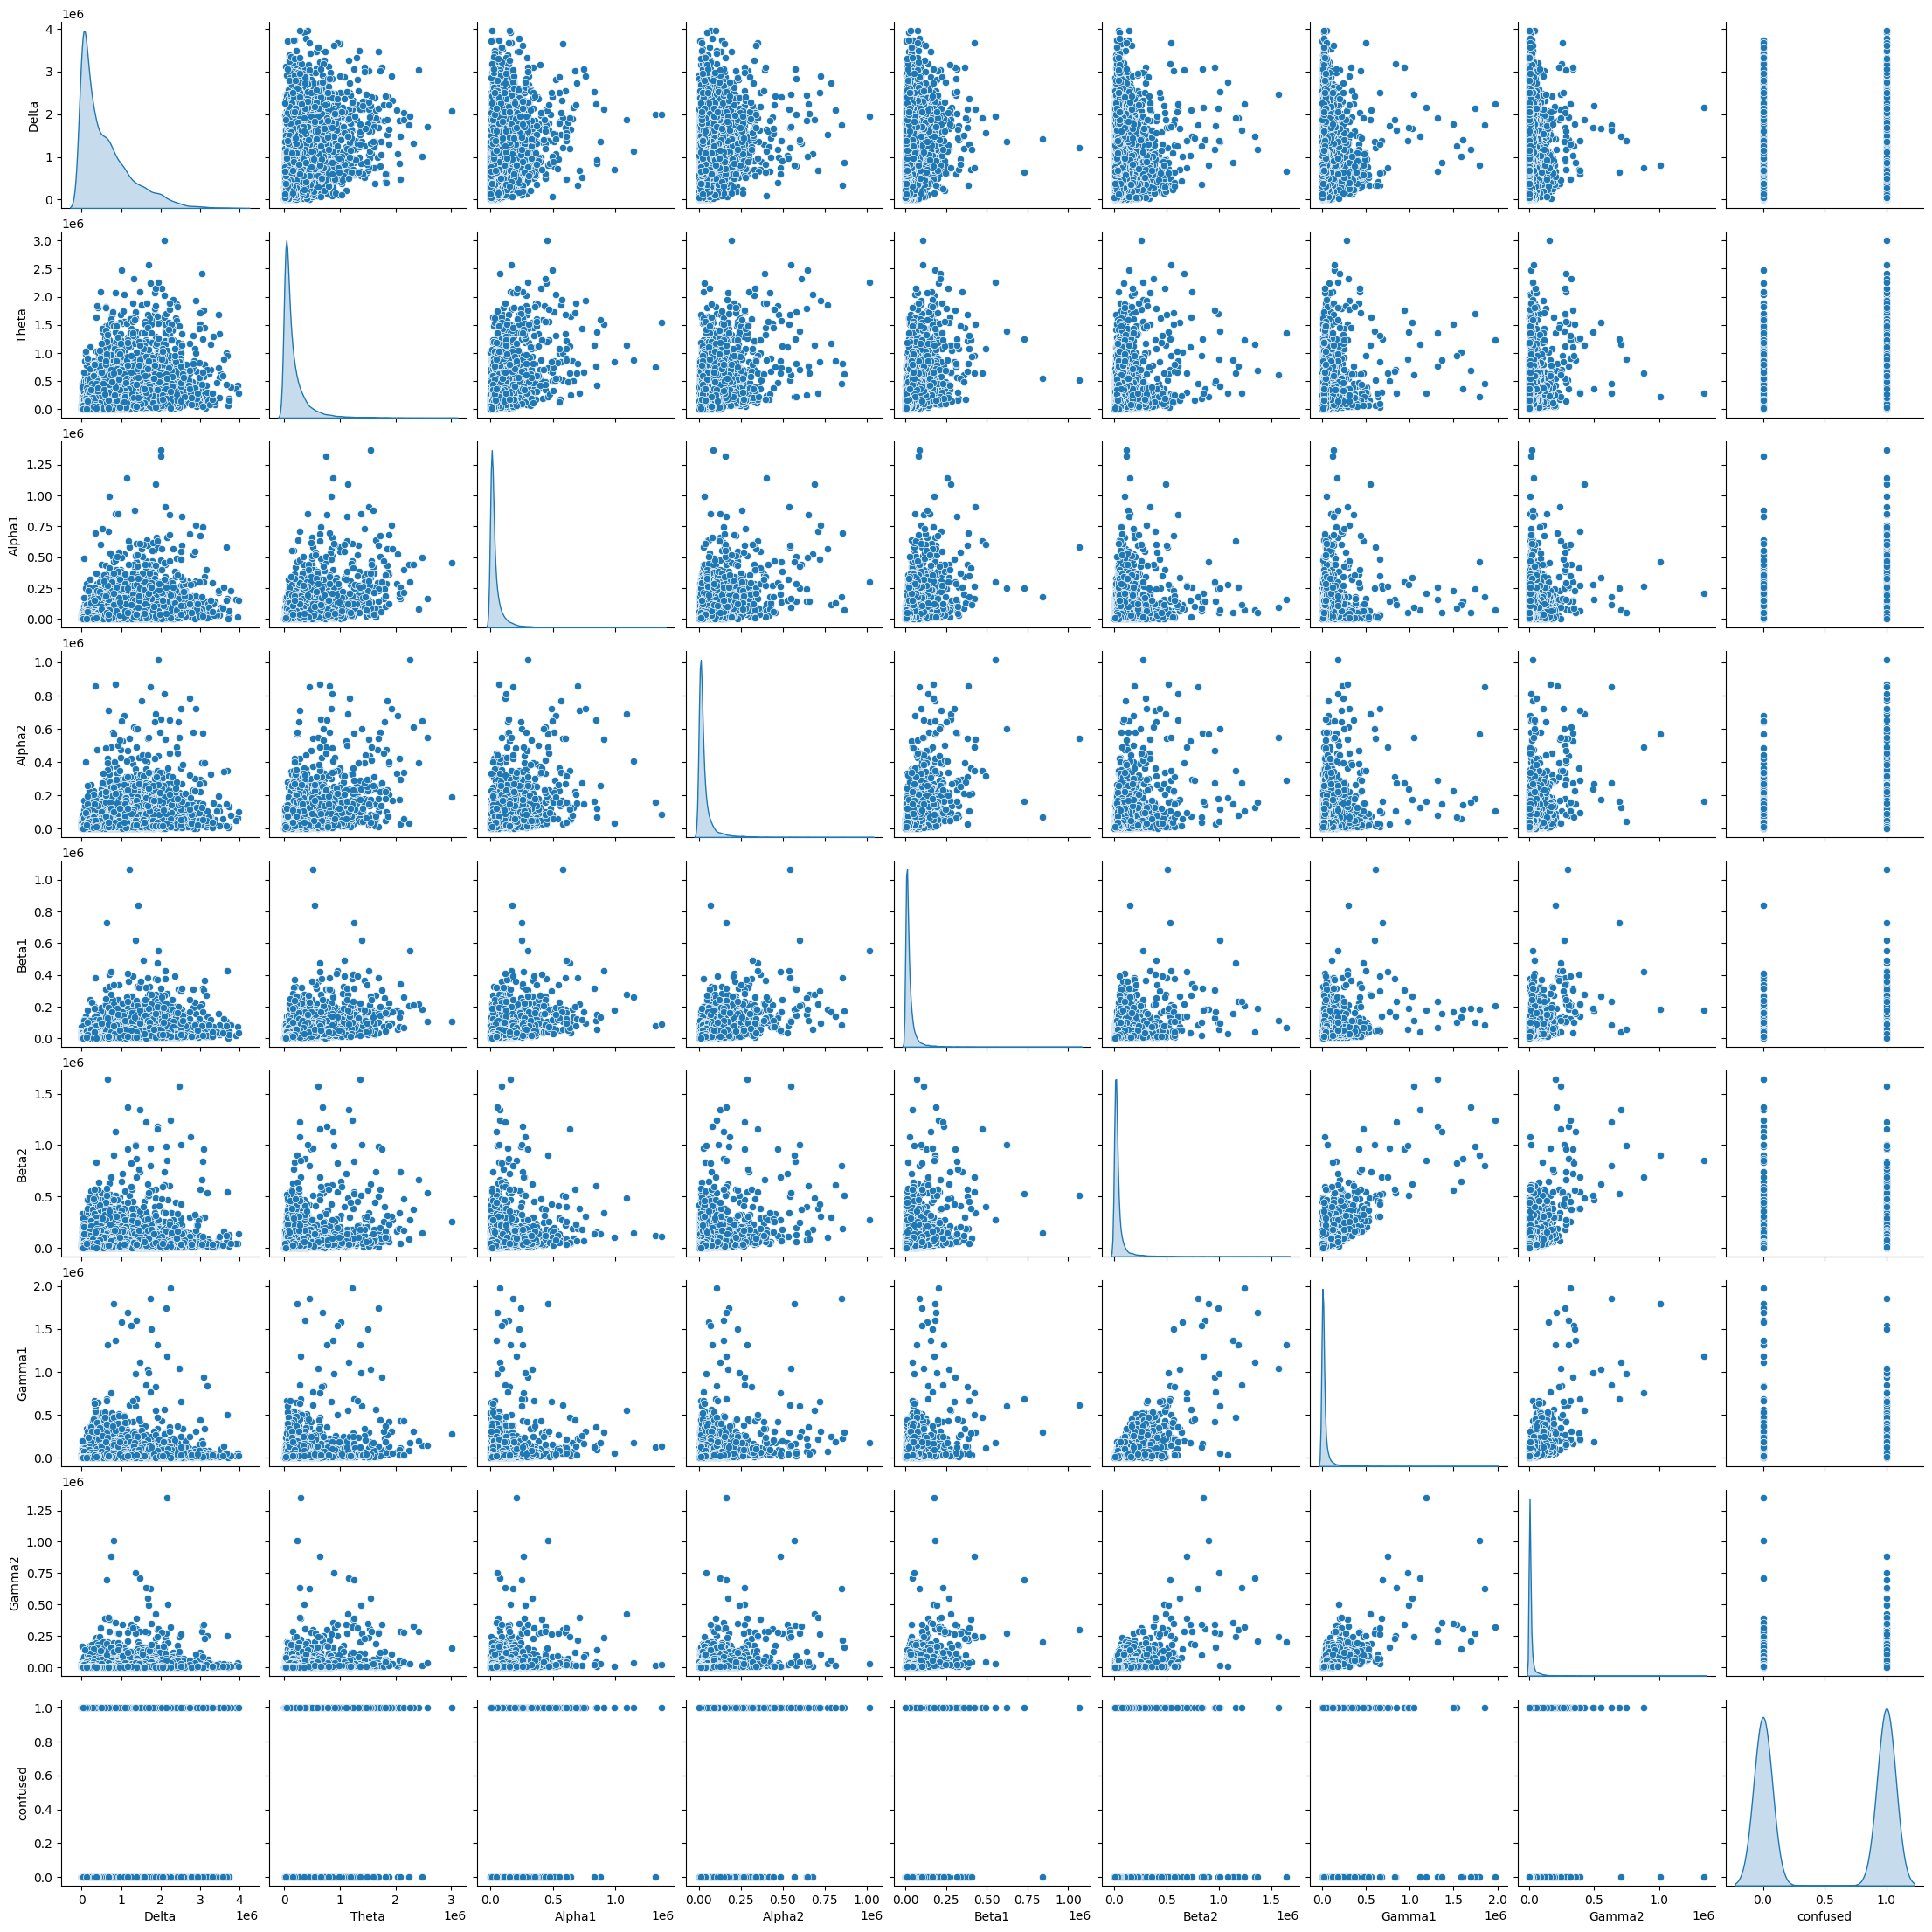

In [189]:
sns.pairplot(df_cleaned, diag_kind='kde')

**Key Observations:**

KDE provides a clearer picture of peaks and the spread of the data (e.g., there are clustering of low values in EEG features, suggests the high values might be outliers).

KDE smooths out noise and irregularities, giving a better estimate of the underlying distribution, <span style="background-color: yellow">we see that the relation of different EEG frequncies with 'confused' is mostly nonlinear.</span>

We generate the correlation heatmap to show the pairwise correlation between the columns (features) in our dataset, providing a visual summary of how different variables relate to each other.

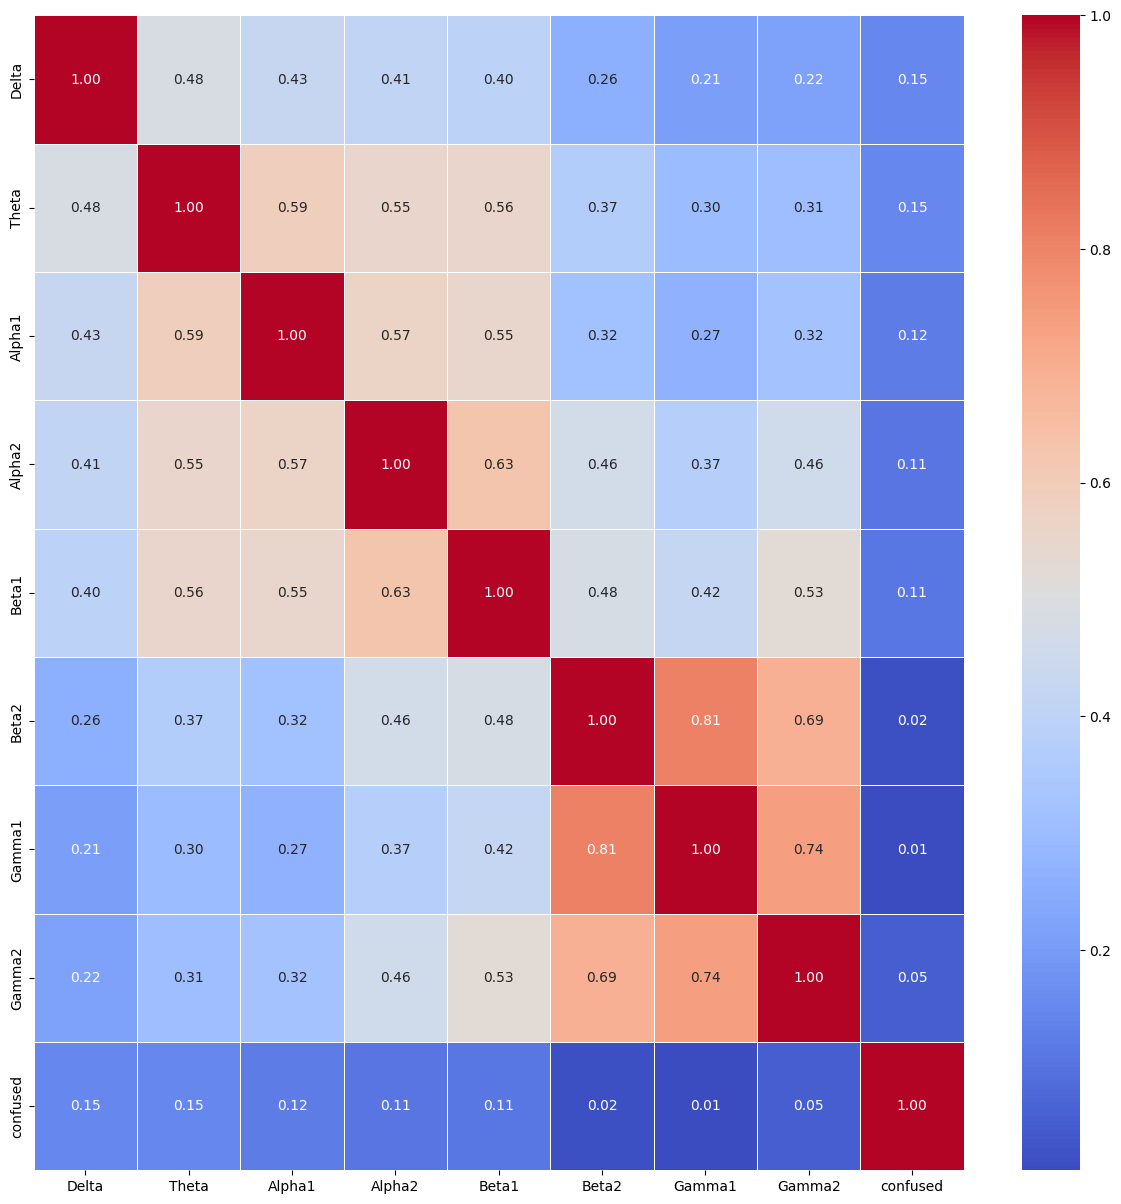

In [190]:
plt.figure(figsize=(15, 15))
cor_matrix = df_cleaned.corr()
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.show()

In order to better find the strongest correlations between every two variables, we sort the correlation matrix and potentially reorder the variables.

In [191]:
# Sort the correlation matrix by absolute correlation values
sorted_cor_matrix = cor_matrix.abs().unstack().sort_values(ascending=False)

# Remove duplicate pairs (since A with B = B with A) and self-correlations (where correlation is 1, which makes sense)
sorted_cor_matrix = sorted_cor_matrix[sorted_cor_matrix < 1]
sorted_cor_matrix = sorted_cor_matrix[sorted_cor_matrix.index.get_level_values(0) < sorted_cor_matrix.index.get_level_values(1)]

print(sorted_cor_matrix)

Beta2   Gamma1      0.808930
Gamma1  Gamma2      0.739836
Beta2   Gamma2      0.692584
Alpha2  Beta1       0.626824
Alpha1  Theta       0.586956
        Alpha2      0.565232
Beta1   Theta       0.555541
Alpha2  Theta       0.553796
Alpha1  Beta1       0.549113
Beta1   Gamma2      0.527484
Delta   Theta       0.483386
Beta1   Beta2       0.480490
Alpha2  Beta2       0.464840
        Gamma2      0.455567
Alpha1  Delta       0.426530
Beta1   Gamma1      0.422165
Alpha2  Delta       0.409898
Beta1   Delta       0.395217
Alpha2  Gamma1      0.374979
Beta2   Theta       0.368975
Alpha1  Gamma2      0.323593
        Beta2       0.317923
Gamma2  Theta       0.308575
Gamma1  Theta       0.300468
Alpha1  Gamma1      0.267677
Beta2   Delta       0.260820
Delta   Gamma2      0.218673
        Gamma1      0.210062
        confused    0.148588
Theta   confused    0.147558
Alpha1  confused    0.121711
Beta1   confused    0.111482
Alpha2  confused    0.107238
Gamma2  confused    0.053533
Beta2   confus

Based on the output, we observed:

**Strong Correlations**: Beta2 & Gamma1 (0.81), Gamma1 & Gamma2 (0.74), and Beta2 & Gamma2 (0.69): These variables are highly correlated, suggesting they are closely related and may share some common patterns.

<span style="background-color: yellow">**Corelation with `confused`**: Delta (0.15) and Theta (0.15) are the EEG frequencies with highest correlation with `confused`, meaning Delta and Theta are the most important in predicting whether confused or not. Beta2 (0.02) and Gamma1 (0.01) are the EEG frequencies with lowest correlation with `confused`, meaning Beta2 and Gamma1 are the least important in predicting whether confused or not.</span>

Through these, we can better determine which correlations we would be more interested in during our analysis process, and it also helps us rule out some irrelevance.

Since we want to predict confusion (the 'confused' column, where 1 is confused and 0 is not confused), based on different types of brain waves (Delta, Theta, Alpha, Beta, Gamma) we compute the mutual information (or information gain) between each brain wave and the target variable ('confused' or not). We compute information gain since information gain can capture non-linear correlations which correlation matrix not able to capture.

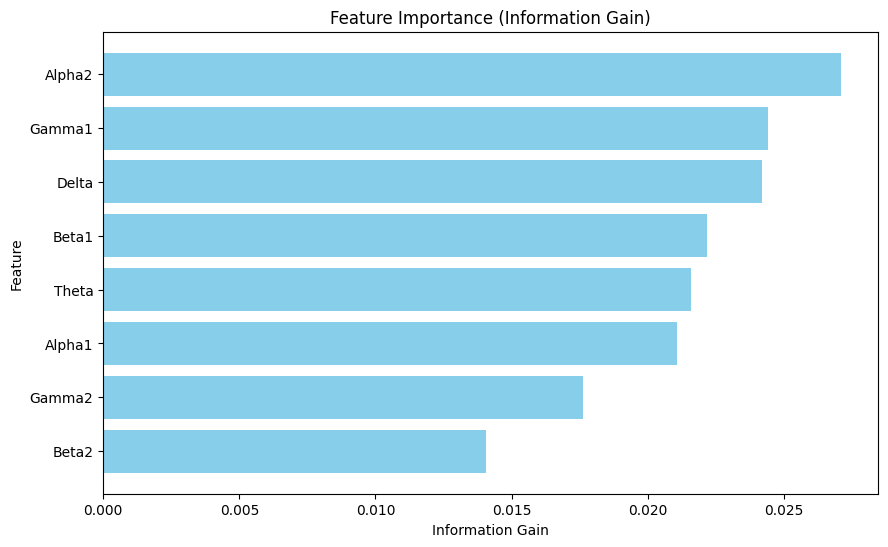

In [192]:
from sklearn.feature_selection import mutual_info_classif
X =  df_cleaned[['Delta','Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']]
y = df_cleaned['confused']
information_gain = mutual_info_classif(X, y)

# Create a DataFrame to store feature names and their information gain
feature_information_gain = pd.DataFrame({'Feature': X.columns,'Information_Gain': information_gain})

# Sort features by information gain in descending order
feature_information_gain = feature_information_gain.sort_values(
    by='Information_Gain', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_information_gain['Feature'],
         feature_information_gain['Information_Gain'], color='skyblue')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.title('Feature Importance (Information Gain)')
plt.gca().invert_yaxis()  # y-axis to have the highest information gain on top
plt.show()

This bar chart shows contribution of each type of EEG frequency band features in predicting whether a subject is confused (c'onfused' column). The importance of each feature is quantified using information gain, which measures how much each feature reduces uncertainty in the prediction.

**Key Observations:**
<span style="background-color: yellow">Alpha2 has the highest information gain among all features, indicating that it contributes the most to predicting confusion. This suggests that activity in the Alpha2 band (8–12 Hz) may have a strong correlation with confusion states.</span>

Gamma1 and Delta are the next most important features, showing that these frequency bands also play significant roles in predicting confusion. Gamma1 represents high-frequency brain activity, while Delta represents low-frequency activity, potentially related to attention and cognitive load.

Theta and Beta1 have moderate information gain, indicating a lower, but still significant, contribution to the prediction. Theta is often associated with memory and cognitive processing, while Beta1 is related to alertness.

Alpha1, Gamma2, and Beta2 have the lowest information gain among the features analyzed, suggesting these frequency bands have minimal predictive power for the confusion state in this dataset.

## Perform classification to predict confused or not confused

We first split the data into features (X-different brain waves) and prediction target (y-confused:1; not confused:0)

In [193]:
X =  df_cleaned.drop(columns=['confused'])
y =  df_cleaned['confused']
print(X.head())
print(y.head())
print(X.shape,y.shape)

       Delta     Theta    Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2
0   301963.0   90612.0   33735.0  23991.0  27946.0   45097.0  33228.0   8293.0
1    73787.0   28083.0    1439.0   2240.0   2746.0    3687.0   5293.0   2740.0
2   758353.0  383745.0  201999.0  62107.0  36293.0  130536.0  57243.0  25354.0
3  2012240.0  129350.0   61236.0  17084.0  11488.0   62462.0  49960.0  33932.0
4  1005145.0  354328.0   37102.0  88881.0  45307.0   99603.0  44790.0  29749.0
0    0
1    0
2    0
3    0
4    0
Name: confused, dtype: int32
(12811, 8) (12811,)


Next, we split the data into train and test sets (80:20)

In [194]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

# Convert to NumPy arrays and reshape if necessary
X_train = X_train.to_numpy().reshape(-1, X_train.shape[1])
X_test = X_test.to_numpy().reshape(-1, X_test.shape[1])
print("X Train Shape: ", X_train.shape)
print("Y Train Shape ",y_train.shape)

X Train Shape:  (10248, 8)
Y Train Shape  (10248,)


## Classificaiton using neural network

Next we train a neural network model

In [195]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LeakyReLU

# Define the Neural Network
'''def create_model(input_shape):
    model = Sequential()
    model.add(Dense(256, activation=LeakyReLU(alpha=0.1), input_shape=(input_shape,)))
    model.add(Dropout(0.4))  # Regularization
    model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model'''
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_shape,)))
    model.add(LeakyReLU(alpha=0.1))  # Add LeakyReLU as a separate layer
    model.add(Dropout(0.4))  # Regularization
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.1))  # Add LeakyReLU as a separate layer
    model.add(Dropout(0.4))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))  # Add LeakyReLU as a separate layer
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Preprocess data
optimizer = Adam(learning_rate=0.0001)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the model
input_shape = X_train_scaled.shape[1]
model = create_model(input_shape)

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,  # 20% of training data for validation
                    epochs=200,
                    batch_size=64,
                    verbose=1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.2f}")

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype(int)

Epoch 1/200


C:\Users\Harry\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Harry\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5445 - loss: 0.6919 - val_accuracy: 0.6063 - val_loss: 0.6692
Epoch 2/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5820 - loss: 0.6795 - val_accuracy: 0.6146 - val_loss: 0.6689
Epoch 3/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5842 - loss: 0.6733 - val_accuracy: 0.6068 - val_loss: 0.6685
Epoch 4/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5823 - loss: 0.6786 - val_accuracy: 0.6122 - val_loss: 0.6676
Epoch 5/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5950 - loss: 0.6721 - val_accuracy: 0.6063 - val_loss: 0.6647
Epoch 6/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5980 - loss: 0.6702 - val_accuracy: 0.6083 - val_loss: 0.6704
Epoch 7/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5948 - loss: 0.6715 - val_accuracy: 0.6107 - val_loss: 0.6718
Epoch 8/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6052 - loss: 0.6709 - val_accuracy: 0.6117

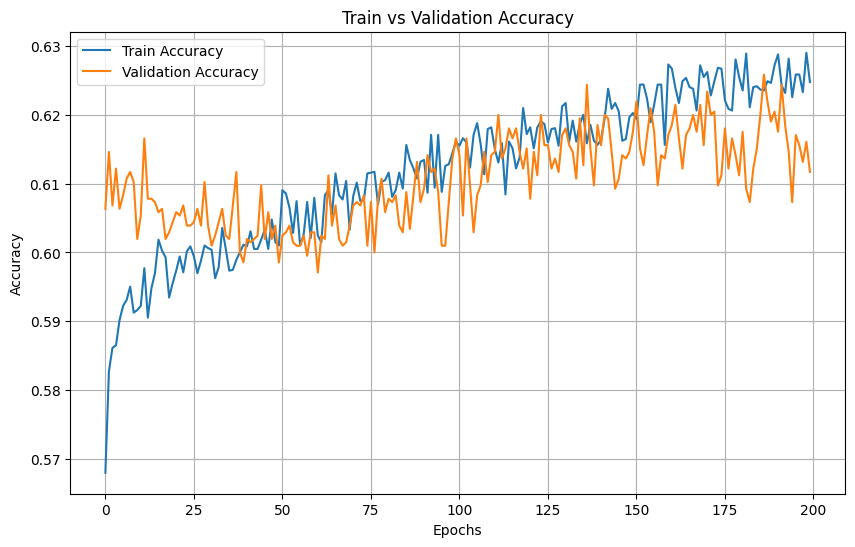

In [196]:
# Extract accuracy and validation accuracy from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Classification with different models: XGBoost, Random Forest, Gradient Boosting

In [197]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
# Define common parameter values
n_estimators = [50, 100]
max_depth = [3, 5]
learning_rate = [0.01, 0.05, 0.1]
max_features = ['sqrt']
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]

# Define the models and their parameter grids
models = [
    ('xgb', make_pipeline(StandardScaler(), xgb.XGBClassifier(objective='binary:logistic', seed=1)), {
        'xgbclassifier__n_estimators': n_estimators,
        'xgbclassifier__max_depth': max_depth,
        'xgbclassifier__learning_rate': learning_rate,
    }),
    ('rf', make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42)), {
        'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_depth': [5, 10],
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
    }),
    ('gb', make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=42)), {
        'gradientboostingclassifier__n_estimators': n_estimators,
        'gradientboostingclassifier__max_depth': max_depth,
        'gradientboostingclassifier__learning_rate': [0.01, 0.1],  # for GradientBoostingClassifier
        'gradientboostingclassifier__max_features': max_features,
        'gradientboostingclassifier__min_samples_split': min_samples_split,
        'gradientboostingclassifier__min_samples_leaf': min_samples_leaf,
    }), 
    ('nn', make_pipeline(StandardScaler(), model), {})
]

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score
f1_scores = []
accuracy_scores = []
model_names = []
conf_matrices = []
precision_scores = []
recall_scores = []

for model_name, model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"\n{model_name.upper()} Results:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    # Convert predictions to binary (0 or 1)
    binary_predictions = (predictions > 0.5).astype(int)

    f1 = f1_score(y_test, binary_predictions)
    accuracy = accuracy_score(y_test, binary_predictions)
    conf_matrix = confusion_matrix(y_test, binary_predictions)
    precision = precision_score(y_test, binary_predictions)
    recall = recall_score(y_test, binary_predictions)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    model_names.append(model_name)
    conf_matrices.append(conf_matrix)
    precision_scores.append(precision)
    recall_scores.append(recall)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")


XGB Results:
Best Parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 100}
Best Score: 0.6159258650858837
Precision: 0.6036
Recall: 0.6408
Accuracy: 0.6001
F1 Score: 0.6216

RF Results:
Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 100}
Best Score: 0.6204139556476091
Precision: 0.6141
Recall: 0.6225
Accuracy: 0.6059
F1 Score: 0.6183

GB Results:
Best Parameters: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 100}
Best Score: 0.6119251032627456
Precision: 0.6141
Recall: 0.6370
Accuracy: 0.608

c:\Program Files\Python_study\python\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6167 - loss: 0.6519

NN Results:
Best Parameters: {}
Best Score: nan
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Precision: 0.6146
Recall: 0.5571
Accuracy: 0.5938
F1 Score: 0.5844


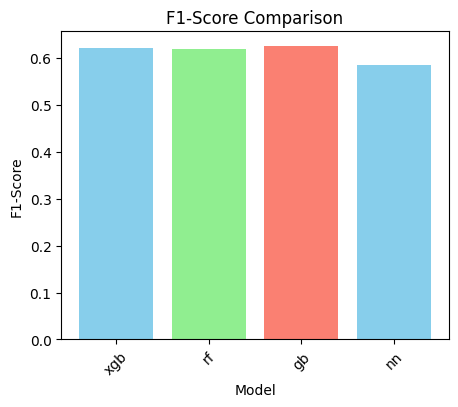

In [198]:
# Define colors for each model
colors = ['skyblue', 'lightgreen', 'salmon']

# Bar plot for F1-scores
plt.figure(figsize=(5, 4))
plt.bar(model_names, f1_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')
plt.xticks(rotation=45)
plt.show()

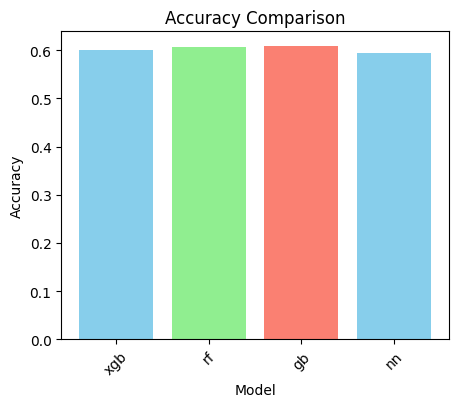

In [199]:
# Bar plot for accuracy scores
colors = ['skyblue', 'lightgreen', 'salmon']
plt.figure(figsize=(5, 4))
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

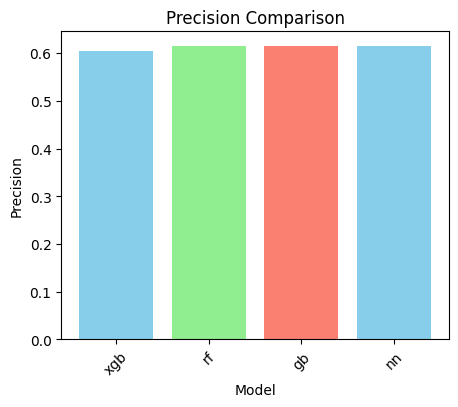

In [200]:
# Bar plot for precision scores
plt.figure(figsize=(5, 4))
plt.bar(model_names, precision_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.xticks(rotation=45)
plt.show()

## ETC AD NASEUM

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [201]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

Our group’s EEG data analysis project considers various ethical issues at each research stage.

During data preparation, we will critically assess how authentic the dataset represents the population, as EEG data can vary widely among individuals. Before using the data, we could check out the original data collection methods to ensure the consent and anonymity for the participants, and addressing risks of potential re-identification from EEG patterns.

In the analysis phase, we have ethical concerns in the processes and bias for data. EEG data is highly sensitive to signal noise, so it requires careful prapration to avoid misinterpretating the data, which could lead to false conclusions on confusion levels. We will try our best to ensure analysis accuracy, to minimizing misleading our further discussion in educational interventions based on our results.

We are also mindful of the societal implications. The misinterpretations of out result could impact students if used in educational tech, potentially leading to undue stress. Hence, our group commits to transparency in reporting and emphasizes the limitations of EEG-based assessments in real-world applications.

EEG data we plan to use is from a diverse sample of students, which would ideally represent a range of cognitive states across different learning backgrounds. However, the real dataset we are analyzing includes a relatively small sample of students (from 10 colleges) which could lead to significant bias. The size and demographics of the sample may not enough to capture the diversity of cognitive responses to online learning. In details, different cultural, educational, or socioeconomic backgrounds may influence how students report and experience confusion, which is not adequately represented in the dataset. Our group could address this by acknowledging the limitations of our dataset’s sample size and participant diversity, and apply techniques to adjust for potential bias during analysis. Include stratify the results based on available demographic factors and discussing these limitations in our final report.

To detect potential bias during the analysis, we split our dataset into each possible subgroup depending on the demographic factors to ensure that the model does not overfit to certain patterns of confusion. We would also consider incorporating additional available datasets to further refine the generalizability and stability of the model.

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff.
This is our conclusion


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.